### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [1]:
nb_fname = "IHA1.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [2]:
NAME1 = "" 
NAME2 = ""
GROUP = ""

### Check Python version

In [3]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [4]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [5]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [6]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/JulianoLagana/deep-machine-learning/master/home-assignments/IHA1/IHA1.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA1 - Assignment

Welcome to the first individual home assignment!  

This assignment consists of two parts:
 * Python and NumPy exercises;
 * Build a deep neural network for forward propagation.
  
The focus of this assignment is for you to gain practical knowledge with implementing forward propagation of deep neural networks without using any deep learning framework. You will also gain practical knowledge in two of Python's scientific libraries [NumPy](https://docs.scipy.org/doc/numpy-1.13.0/index.html) and [Matplotlib](https://matplotlib.org/devdocs/index.html).  

Skeleton code is provided for most tasks and every part you are expected to implement is marked with **TODO**. Throughout the assignment you will also need to submit written answers to some questions. These questions are mainly to make you reflect on some particular topics and your answers will not be graded in detail. 

We expect you to search and learn by yourself any commands you think are useful for these tasks. Don't limit yourself to what was taught in CL1. Use the help function, [stackoverflow](https://stackoverflow.com/), google, the [python documentation](https://docs.python.org/3.5/library/index.html) and the [NumPy](https://docs.scipy.org/doc/numpy-1.13.0/index.html) documentation to your advantage.  

**IMPORTANT NOTE**: The tests available are not exhaustive, meaning that if you pass a test you have avoided the most common mistakes, but it is still not guaranteed that your solution is 100% correct.  

Lets start by importing the necessary libraries below.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from utils.tests.iha1Tests import *

## 1. Lists and arrays introduction
First, we will warm up with a Python exercise and few NumPy exercises.

### 1.1 List comprehensions
Examine the code snippet provided below.

In [8]:
myList = []
for i in range(25):
    if i % 2 == 0:
        myList.append(i**2)
        
print(myList)

[0, 4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576]


This is not a very "[pythonic](http://docs.python-guide.org/en/latest/writing/style/)" way of writing. Lets re-write the code above using a [list comprehension](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions). The result will be less code, more readable and elegant. Your solution should be able to fit into one line of code.

In [9]:
myList = [i**2 for i in range(25) if i % 2 == 0] # TODO
# YOUR CODE HERE
print(myList)

[0, 4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576]


In [10]:
# sample output from cell above for reference
# [0, 4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576]

### 1.2 Numpy array vs numpy vectors
Run the cell below to create a numpy array.   

In [11]:
myArr = np.array([1, 9, 25, 49, 81, 121, 169, 225, 289, 361, 441, 529])
print(myArr)
print(myArr.shape)

[  1   9  25  49  81 121 169 225 289 361 441 529]
(12,)


One of the core features of numpy is to efficiently perform linear algebra operations.
There are two types of one-dimensional representations in numpy: arrays of shape (x,) and vectors of shape (x,1).

The above result indicates that **myArr** is an array of 12 elements with shape (12,).  

Numpy's arrays and vectors both have the type of `numpy.ndarray` but have in some cases different characteristics and it is important to separate the two types because it will save a lot of debugging time later on. Read more about numpy shapes [here](https://stackoverflow.com/a/22074424).

Run the code below to see how the transpose operation behaves differently between an array and vector.

In [12]:
# print the shape of an array and the shape of a transposed array
print('myArr is an array of shape:')
print(myArr.shape)
print('The transpose of myArr has the shape:')
print(myArr.T.shape)

# print the shape of a vector and the transpose of a vector
myVec = myArr.reshape(12,1)
print('myVec is a vector of shape:')
print(myVec.shape)
print('The transpose of myVec has the shape:')
print(myVec.T.shape)

myArr is an array of shape:
(12,)
The transpose of myArr has the shape:
(12,)
myVec is a vector of shape:
(12, 1)
The transpose of myVec has the shape:
(1, 12)


### 1.3 Numpy exercises
Now run the cell below to create the numpy array `numbers` and then complete the exercises sequentially.

In [13]:
numbers = np.arange(24)
print(numbers)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [14]:
# TODO: reshape numbers into a 6x4 matrix
numbers=numbers.reshape(6,4)
# YOUR CODE HERE
print(numbers)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [15]:
# sample output from cell above for reference
#  [[ 0  1  2  3]
#   [ 4  5  6  7]
#   [ 8  9 10 11]
#   [12 13 14 15]
#   [16 17 18 19]
#   [20 21 22 23]]

In [16]:
# test case
test_numpy_reshape(numbers)

Test passed


In [17]:
# TODO: set the element of the last row of the last column to zero
# Hint: Try what happends when indices are negative
numbers[-1,-1]=0

# YOUR CODE HERE
print(numbers)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22  0]]


In [18]:
# sample output from cell above for reference
#  [[ 0  1  2  3]
#   [ 4  5  6  7]
#   [ 8  9 10 11]
#   [12 13 14 15]
#   [16 17 18 19]
#   [20 21 22  0]]

In [19]:
# test case
test_numpy_neg_ix(numbers)

Test passed


In [20]:
# TODO: set every element of the 0th row to 0
numbers[0,]=0

# YOUR CODE HERE
print(numbers)

[[ 0  0  0  0]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22  0]]


In [21]:
# sample output from cell above for reference
#  [[ 0  0  0  0]
#   [ 4  5  6  7]
#   [ 8  9 10 11]
#   [12 13 14 15]
#   [16 17 18 19]
#   [20 21 22  0]]

In [22]:
# test case
test_numpy_row_ix(numbers)

Test passed


In [23]:
# TODO: append a 1x4 row vector of zeros to `numbers`, 
# resulting in a 7x4 matrix where the new row of zeros is the last row
# Hint: A new matrix must be created in the procedure. Numpy arrays are not dynamic.
numbers=np.vstack([numbers, np.zeros(4)])
# YOUR CODE HERE
print(numbers)
print(numbers.shape)

[[ 0.  0.  0.  0.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]
 [16. 17. 18. 19.]
 [20. 21. 22.  0.]
 [ 0.  0.  0.  0.]]
(7, 4)


In [24]:
# sample output from cell above for reference
#   [[ 0  0  0  0]
#    [ 4  5  6  7]
#    [ 8  9 10 11]
#    [12 13 14 15]
#    [16 17 18 19]
#    [20 21 22  0]
#    [ 0  0  0  0]]
#  (7, 4)

In [25]:
# test case
test_numpy_append_row(numbers)

Test passed


In [26]:
# TODO: set all elements above 10 to the value 1
b=(numbers>10)
numbers[b]=1
# YOUR CODE HERE
print(numbers)

[[ 0.  0.  0.  0.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  0.]
 [ 0.  0.  0.  0.]]


In [27]:
# sample output from cell above for reference
#  [[ 0  0  0  0]
#   [ 4  5  6  7]
#   [ 8  9 10  1]
#   [ 1  1  1  1]
#   [ 1  1  1  1]
#   [ 1  1  1  0]
#   [ 0  0  0  0]]

In [28]:
# test case
test_numpy_bool_matrix(numbers)

Test passed


In [29]:
# TODO: compute the sum of every row and replace `numbers` with the answer
# `numbers` will be a (7,) array as a result
numbers=np.sum(numbers, axis=1)
# YOUR CODE HERE
print(numbers.shape)
print(numbers)

(7,)
[ 0. 22. 28.  4.  4.  3.  0.]


In [30]:
# sample output from cell above for reference
#   (7,)
#   [ 0 22 28  4  4  3  0]

In [31]:
# test case
test_numpy_sum(numbers)

Test passed


## 2 Building your deep neural network
It is time to start implementing your first feed-forward neural network. In this lab you will only focus on implementing the forward propagation procedure. 

As you know, a feed-forward neural network consists of a sequence of layers, where the output from one layer is the input to the following layer. Below you can find an example of a feed-forward neural network with 2 hidden layers (blue) and 1 output layer (red). 

![title](utils/FFNN.png)

**What would be your approach to implement a feed-forward neural network? Please provide a brief and high level explanation on how would you implement the several components of network; for instance, would you use any `python` class or only functions?** We will not grade this answer in detail. The objective with this question is to help you reflect upon how to structure the code. This will hopefully enable you to understand the code below more easily. As long as it is clear from your answer that you have tried to briefly describe the overall structure of the code, we will accept your answer.

**Your answer:** (I will use python functions to implement a forward neural network, first initialize a matrix for w and zero for b and then calculate the Z and then apply the activation function to calculate A using a for loop for 1 to l layer)

In this exercise, you will implement several components of a feed-forward network, such as a layers, activation functions and weight initialization functions, and from those create your own feed-forward neural network implementation. 

NOTE: When using a neural network, due to memory and computational constraints, you can not forward propagate the entire dataset at once. Therefore, you divide the dataset into a number of sets/parts called batches. A batch will make up for the first dimension of every input to a layer and the notation `(BATCH_SIZE, NUM_FEATURES)` simply means the dimension of a batch of samples where every sample has `NUM_FEATURES` features.

### 2.1 Activation functions
You will start by defining a few activation functions that are later needed by the neural network.

#### 2.1.1 ReLU
The neural network will use the ReLU activation function in every layer except for the last. ReLU does element-wise comparison of the input matrix. For example, if the input is `X`, and `X[i,j] == 2` and `X[k,l] == -1`, then after applying ReLU, `X[i,j] == 2` and `X[k,l] == 0` should be true.  

The formula for implementing ReLU for a single neuron $i$ is:
\begin{equation}
relu(z_i) = 
    \begin{cases}
      0, & \text{if}\ z_i \leq 0 \\
      z_i, & \text{otherwise}
    \end{cases}
\end{equation}

Now implement `relu` in vectorized form

In [32]:
def relu(z):
    """ Implement the ReLU activation function
    
    Arguments:
    z - the input of the activation function. Has a type of 'numpy.ndarray'
    
    Returns:
    a - the output of the activation function. Has a type of numpy.ndarray and the same shape as 'z'
    """
    
    z[z<0]=0
    a = z # TODO
    # YOUR CODE HERE
    
    return a

In [33]:
# test case
test_relu(relu)

Test passed


Can you name some of the advantages of the ReLU activation function? (We will not grade this answer in detail.)

**Your answer:** (It is quick in training compared to use tanh or signoid activation function)

#### 2.1.2 Sigmoid
The sigmoid activation function is common for binary classification. This is because it squashes its input to the range [0,1].  
Implement the activation function `sigmoid` using the formula:  
\begin{equation}
    \sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation}

In [34]:
def sigmoid(z):
    """ Implement the sigmoid activation function
    
    Arguments:
    z - the input of the activation function. Has a type of 'numpy.ndarray'
    
    Returns:
    a - the output of the activation function. Has a type of 'numpy.ndarray' and the same shape as 'z'
    """
    z=1/(1+np.exp(-z))
    a = z # TODO
    # YOUR CODE HERE
    
    return a

In [35]:
# test case
test_sigmoid(sigmoid)

Test passed


Why is the sigmoid activation function useful for binary classification? Feel free to use some numerical examples to show how the magnitudes of the variable $z$ affect the output of the sigmoid layer. (We will not grade this answer in detail.)

**Your answer:** (sigmoid result will between 0 to 1)

#### 2.1.3 Visualization
Make a plot using matplotlib to visualize the activation functions between the input interval [-3,3]. The plot should have the following properties
 * one plot should contain a visualization of both `ReLU` and `sigmoid`;
 * x-axis: range of values between [-3,3], **hint**: np.linspace;
 * y-axis: the value of the activation functions at a given input `x`;
 * a legend explaining which line represents which activation function.

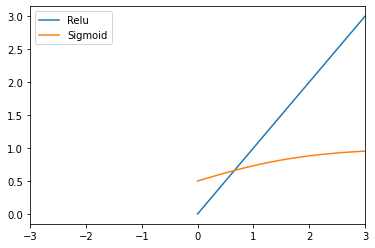

In [52]:
# TODO: make a plot of ReLU and sigmoid values in the interval [-3,3]
x=np.linspace(-3,3,100)
y1=relu(x)
y2=sigmoid(x)
fig, axes=plt.subplots()
axes.plot(x,y1)
axes.plot(x,y2)
axes.set_xlim([-3,3])
axes.legend(['Relu', 'Sigmoid'], loc=2)
# YOUR CODE HERE

#### 2.1.4 Softmax
You will use the softmax activation function / classifier as the final layer of your neural network later in the assignment. Implement `softmax` according to the formula below. The subtraction of the maximum value is there solely to avoid overflows in a practical implementation.
\begin{equation}
softmax(z_i) = \frac{e^{z_i - max(\mathbf{z})}}{ \sum^j e^{z_j - max(\mathbf{z})}}
\end{equation}


In [53]:
def softmax(z):
    """ Implement the softmax activation function
    
    Arguments:
    z - the input of the activation function, shape (BATCH_SIZE, FEATURES) and type 'numpy.ndarray'
    
    Returns:
    a - the output of the activation function, shape (BATCH_SIZE, FEATURES) and type 'numpy.ndarray'
    """
    batchsize=z.shape[0]
    z=np.exp(z)
    a = z/np.sum(z, axis=1).reshape(batchsize,1) # TODO
    # YOUR CODE HERE
    
    return a

In [38]:
# test case
test_softmax(softmax)

Test passed


What are the main differences between using `sigmoid` and `softmax` for multi-class classification problems? And when the number of classes is 2? (We will not grade this answer in detail.)

**Your answer:** (sigmoid is for binary classfication (0,1) and softmax is for the number of classes larger then 2)

### 2.2 Initialize weights
You will implement a helper function that takes the shape of a layer as input, and returns an initialized weight matrix $\mathbf{W}$ and bias vector $\mathbf{b}$ as output. The matrix $\mathbf{W}$ should be sampled from a normal distribution with mean 0 and standard deviation 2, and $\mathbf{b}$ should be initialized to all zeros.

In [39]:
def initialize_weights(layer_shape):
    """ Implement initialization of the weight matrix and biases
    
    Arguments:
    layer_shape - a tuple of length 2, type (int, int), that determines the dimensions of the weight matrix: (input_dim, output_dim)
    
    Returns:
    w - a weight matrix with dimensions of 'layer_shape', (input_dim, output_dim), that is normally distributed with
        properties mu = 0, stddev = 2. Has a type of 'numpy.ndarray'
    b - a vector of initialized biases with shape (1,output_dim), all of value zero. Has a type of 'numpy.ndarray'
    """
    w = np.random.normal(0,2,layer_shape) # TODO
    b = np.zeros((1,layer_shape[1]))# TODO
    # YOUR CODE HERE
    
    return w, b

In [40]:
# test case
test_initialize_weights(initialize_weights)

Test passed


### 2.3 Feed-forward neural network layer module
To build a feed-forward neural network of arbitrary depth you are going to define a neural network layer as a module that can be used to stack layers upon each other. Your task is to complete the `Layer` class by following the descriptions in the comments. Recall the formula for forward propagation of an arbitrary layer $l$:

\begin{equation}
\mathbf{a}^{[l]} = g(\mathbf{z}^{[l]}) = g(\mathbf{a}^{[l-1]}\mathbf{w}^{[l]} +\mathbf{b}^{[l]})
\end{equation}

where $g$ is the activation function given by `activation_fn`, which can be relu, sigmoid or softmax. 

In [41]:
class Layer:
    """ 
    TODO: Build a class called Layer that satisfies the descriptions of the methods
    Make sure to utilize the helper functions you implemented before
    """
    
    def __init__(self, input_dim, output_dim, activation_fn=relu):
        """
        Arguments:
        input_dim - the number of inputs of the layer. type int
        output_dim - the number of outputs of the layer. type int
        activation_fn - a reference to the activation function to use. Should be 'relu' as a default
                        possible values are the 'relu', 'sigmoid' and 'softmax' functions you implemented earlier.
                        Has the type 'function'
        
        Attributes:
        w - the weight matrix of the layer, should be initialized with 'initialize_weights'
            and has the shape (INPUT_FEATURES, OUTPUT_FEATURES) and type 'numpy.ndarray'
        b - the bias vector of the layer, should be initialized with 'initialize_weights'
            and has the shape (1, OUTPUT_FEATURES) and type 'numpy.ndarray'
        activation_fn - a reference to the activation function to use.
                        Has the type 'function'
        """
        self.w, self.b = initialize_weights((input_dim,output_dim)) # TODO
        self.activation_fn = activation_fn # TODO
        # YOUR CODE HERE
        
        
    def forward_prop(self, a_prev):
        """ Implement the forward propagation module of the neural network layer
        Should use whatever activation function that 'activation_fn' references to
        
        Arguments:
        a_prev - the input to the layer, which may be the data 'X', or the output from the previous layer.
            a_prev has the shape of (BATCH_SIZE, INPUT_FEATURES) and the type 'numpy.ndarray'
        
        Returns:
        a - the output of the layer when performing forward propagation. Has the type 'numpy.ndarray'
        """
        a = self.activation_fn(a_prev.dot(self.w)+self.b) # TODO
        # YOUR CODE HERE
        
        return a

In [42]:
# test case, be sure that you pass the previous activation function tests before running this test
test_layer(Layer, relu, sigmoid, softmax)

Test passed


### 2.4 Backward propagation

In the previous exercise you only implemented the forward propagation of the layer. However, when training a network, you would also need to implement the backward propagation of the layer in order to be able to update its weights. (You won't need to do this in this assignment since you will not train the network. Instead you will load the network weights, which are obtained from a previously trained network.)

Provide a high-level explanation of how you would modify your current implementation of the `Layer` class in order to add the backward propagation. (We will not grade this in detail. It is enough that your answer demonstrates that you have thought about how to perform backprop using these classes.)

**Your answer:** (first get dZ then to dW)

### 2.5 Example - Logistic regression 
Binary logistic regression is a classifier where classification is performed by applying the sigmoid activation function to a linear combination of input values. You will now try out your neural network layer by utilizing it as a linear combination of input values and apply the sigmoid activation function to classify a simple problem. 

The cell below defines a dataset of 5 points of either class `0` or class `1`. Your assignment is to:  
1. Create an instance of a `Layer` with the sigmoid activation function;
2. Manually tune the weights `w` and bias `b` of your layer.

You can use `test_logistic` to visually inspect how your classifier is performing. In order to  be successful in this exercise you need select values for the weights `w` and bias `b` such that all points are classified correctly. 

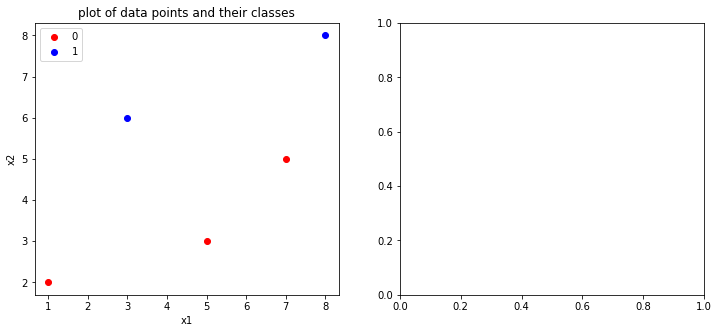

In [43]:
# Run this cell to create the dataset
X_s = np.array([[1, 2],
               [5, 3],
               [8, 8],
               [7, 5],
               [3, 6]])
Y_s = np.array([0,0,1,0,1])

test_logistic(X_s, Y_s)

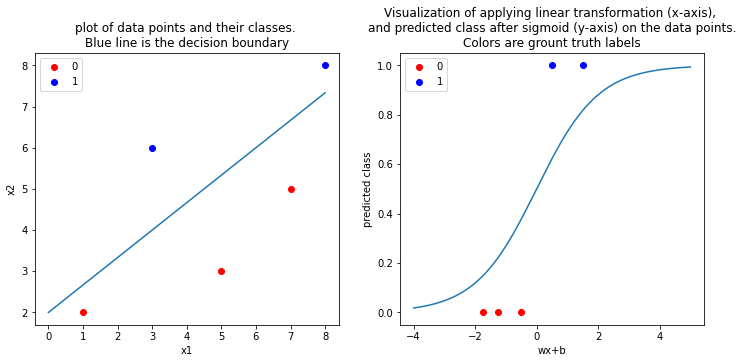

test passed!


In [57]:
# create an instance of layer
l = Layer(2,1,sigmoid)

# TODO: manually tune weights
l.w = np.array([[-0.5],[0.75]])
l.b = np.array([[-1.5]])
# YOUR CODE HERE

# testing your choice of weights with this function
test_logistic(X_s,Y_s,l,sigmoid)

### 2.6 Feed-forward neural network
You will now define the actual neural network class. It is an L-layer neural network, meaning that the number of layers and neurons in each layer is specified as input by the user. Once again, you will only focus on implementing the forward propagation part.

Read the descriptions in the comments and complete the **TODO**s.

In [45]:
class NeuralNetwork:
    """ 
    TODO: Implement an L-layer neural network class by utilizing the Layer module defined above 
    Each layer should use 'relu' activation function, except for the output layer, which should use 'softmax'
    """
    
    def __init__(self, input_n, layer_dims):
        """
        Arguments:
        input_n    - the number of inputs to the network. Should be the same as the length of a data sample
                     Has type int
        layer_dims - a python list or tuple of the number of neurons in each layer. Layer 'l' should have a weight matrix  
                     with the shape ('layer_dims[l-1]', 'layer_dims[l]'). 
                     'layer_dims[-1]' is the dimension of the output layer.
                     Layer 1 should have the dimensions ('input_n', 'layer_dims[0]').
                     len(layer_dims) is the depth of the neural network
        Attributes:
        input_n - the number of inputs to the network. Has type int
        layers  - a python list of each layer in the network. Each layer should use the 'relu' activation function,
                  except for the last layer, which should use 'softmax'. 
                  Has type 'list' containing layers of type 'Layer'
        """
        
        self.input_n = input_n # TODO
        self.layers=[]
        for i in range(0,len(layer_dims)-1):
            self.layers.append(Layer(input_n, layer_dims[i]))
            input_n=layer_dims[i]
        self.layers.append(Layer(input_n, layer_dims[-1],softmax))
        # YOUR CODE HERE
        
    def forward_prop(self, x):
        """ 
        Implement the forward propagation procedure through the entire network, from input to output.
        You will now connect each layer's forward propagation function into a chain of layer-wise forward propagations.
        
        Arguments:
        x - the input data, which has the shape (BATCH_SIZE, NUM_FEATURES) and type 'numpy.ndarray'
        
        Returns:
        a - the output of the last layer after forward propagating through the every layer in 'layers'.
            Should have the dimension (BATCH_SIZE, layers[-1].w.shape[1]) and type 'numpy.ndarray'
        """
        for layer in self.layers:
            x=layer.forward_prop(x)
        a=x
        # YOUR CODE HERE
        return a

In [46]:
# test case
test_neuralnetwork(NeuralNetwork)

Test passed


## 3 Making predictions with a neural network
In practice, its common to load weights to your neural network that has already been trained.  
In this section, you will create an instance of your neural network, load trained weights from disk, and perform predictions.

### 3.1 Load weights from disk
Create an instance of `NeuralNetwork` with input size $28 \times 28 = 784$, two hidden layers of size 100 and an output layer of size 10. Thereafter, load the weights contained in `./utils/ann_weights.npz` to your network.

In [47]:
input_n=784
layer_dims=[100,100,10]
ann = NeuralNetwork(input_n,layer_dims)
# YOUR CODE HERE

# load weights
weights = np.load('./utils/ann_weights.npz')
for l in range(len(ann.layers)):
    ann.layers[l].w = weights['w' + str(l)]
    ann.layers[l].b = weights['b' + str(l)]

### 3.2 Prediction
Now, implement the function `predict_and_correct` which does the following:
1. Load `./utils/test_data.npz` from disk;
2. Extract test data `X` and `Y` from file;
3. Perform for every pair of data:  
    a. plot the image `x`; <br> 
    b. make a prediction using your neural network by forward propagating and picking the most probable class;     
    c. check whether the prediction is correct (compare with the ground truth number `y`);    
    d. print the predicted label and wether it was correct or not. 

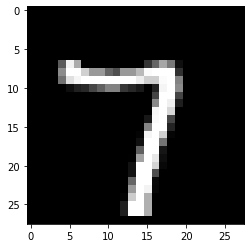

The prediction was 7, it was correct!


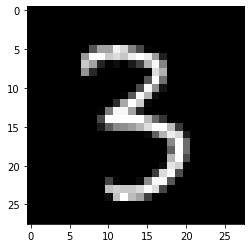

The prediction was 3, it was correct!


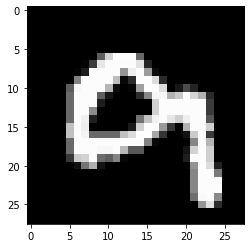

The prediction was 9, it was correct!


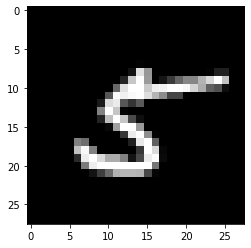

The prediction was 5, it was correct!


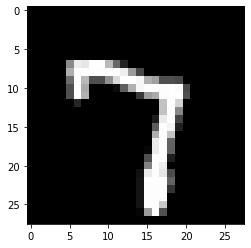

The prediction was 7, it was correct!


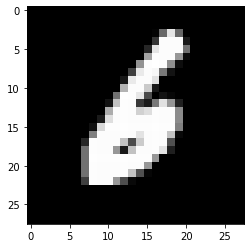

The prediction was 6, it was correct!


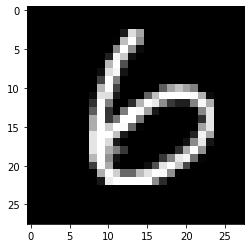

The prediction was 6, it was correct!


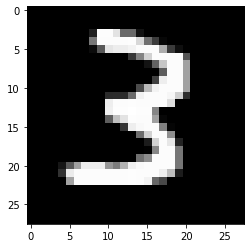

The prediction was 3, it was correct!


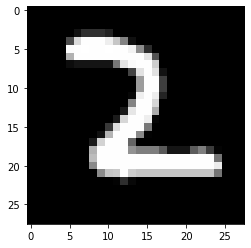

The prediction was 2, it was correct!


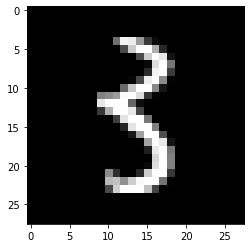

The prediction was 1, it was incorrect!


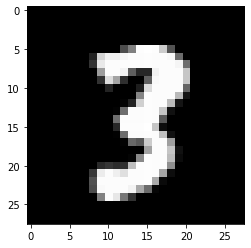

The prediction was 3, it was correct!


In [48]:
def predict_and_correct(ann):
    """ Load test data from file and predict using your neural network. 
    Make a prediction for ever data sample and print it along with wether it was a correct prediction or not
    
    Arguments:
    ann - the neural network to use for prediction. Has type `NeuralNetwork`
    
    Returns: # for test case purposes
    A `numpy.ndarray` of predicted classes (integers [0-9]) with shape (11,)
    """
    data = np.load('./utils/test_data.npz')
    X, cls = data['X'], data['Y']
    
    cls_preds = [np.argmax(ann.forward_prop(i))for i in X]  # TODO: make a predicted number for every image in X
    # YOUR CODE HERE
    
    for i in range(len(X)):
        plt.imshow(X[i].reshape(28,28), cmap='gray')
        plt.show()
        correct = cls_preds[i] == cls[i]
        print('The prediction was {0}, it was {1}!'.format(cls_preds[i], 'correct' if correct else 'incorrect'))
        
    return cls_preds
        
cls_pred = predict_and_correct(ann)

In [49]:
# final test case
test_predict_and_correct_answer(cls_pred)

Test passed, you have implemented your neural network correctly!


## Congratulations!
You have successfully implemented a neural network from scratch using only NumPy!  